In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [107]:
df = pd.read_csv("Algerian_forest_fires_dataset_CLEANED.csv")

In [108]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [109]:
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [110]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [111]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"), 0, 1)

In [112]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [113]:
X = df.drop("FWI",axis=1)
y = df["FWI"]

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=69)

In [115]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

<Axes: >

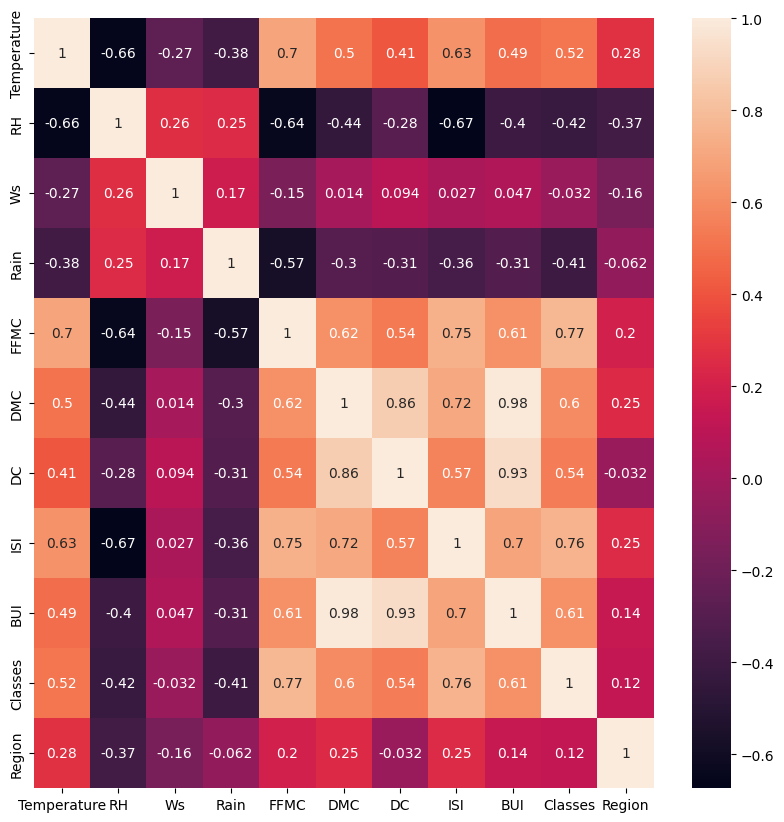

In [116]:
corr = X_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

In [117]:
def correlation(dataset, threshold):
    col_corr = set()
    corr = dataset.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold:
                col_corr.add(corr.columns[i])
    
    return col_corr

In [118]:
# features to be removed i.e. features with multicollinearity
cols = correlation(X_train, 0.85)
cols

{'BUI', 'DC'}

In [119]:
# drop those features
X_train.drop(cols, axis=1, inplace=True)
X_test.drop(cols, axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

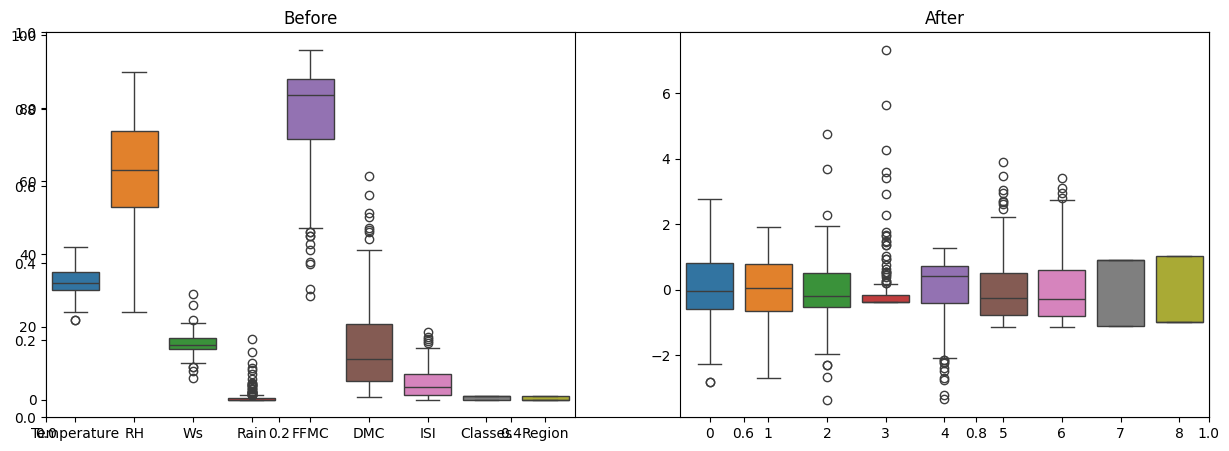

In [121]:
# Box Plots to understand the effect of StandardScaler

plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title("Before")

plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title("After")

plt.show()

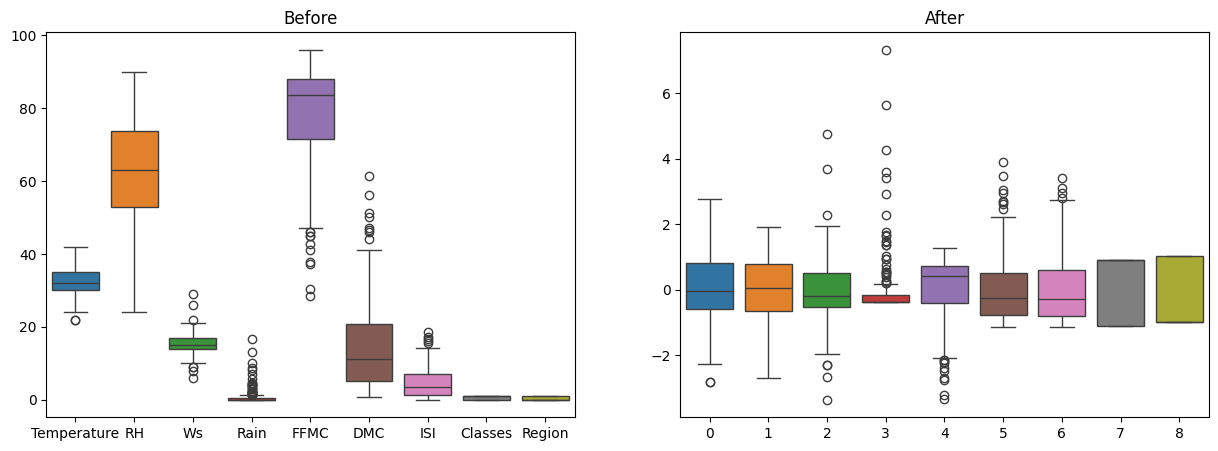

In [122]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Create parent plot with subplots

# First subplot
sns.boxplot(data=X_train, ax=axes[0])
axes[0].set_title("Before")

# Second subplot
sns.boxplot(data=X_train_scaled, ax=axes[1])
axes[1].set_title("After")

plt.show()


Mean Absolute Error :  0.8083051662444789
R2 Score :  0.9196969045281639


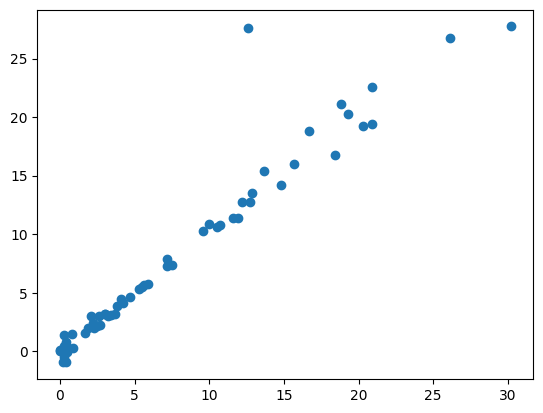

In [123]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error : ", mae)
print("R2 Score : ", score)
plt.scatter(y_test, y_pred)

Mean Absolute Error :  1.1772093282336482
R2 Score :  0.920653081702548


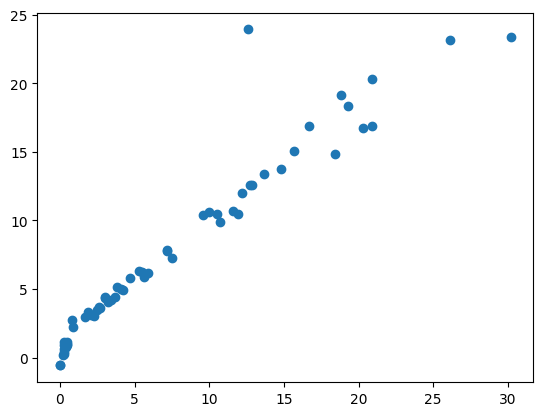

In [124]:
# Lasso Regression

from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error : ", mae)
print("R2 Score : ", score)
plt.scatter(y_test, y_pred)

Mean Absolute Error :  0.793627963732903
R2 Score :  0.9210172453115268


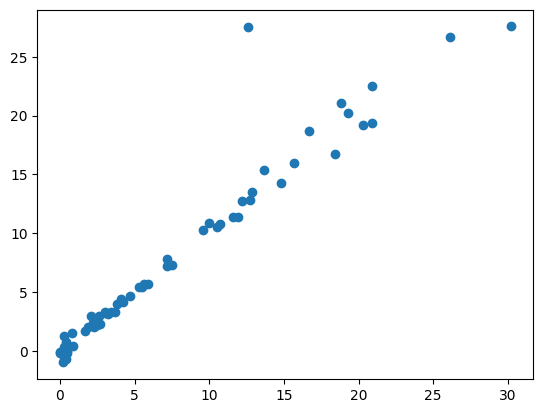

In [125]:
# Cross Validation Lasso

from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)

lassocv.fit(X_train_scaled, y_train)
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error : ", mae)
print("R2 Score : ", score)
plt.scatter(y_test, y_pred)